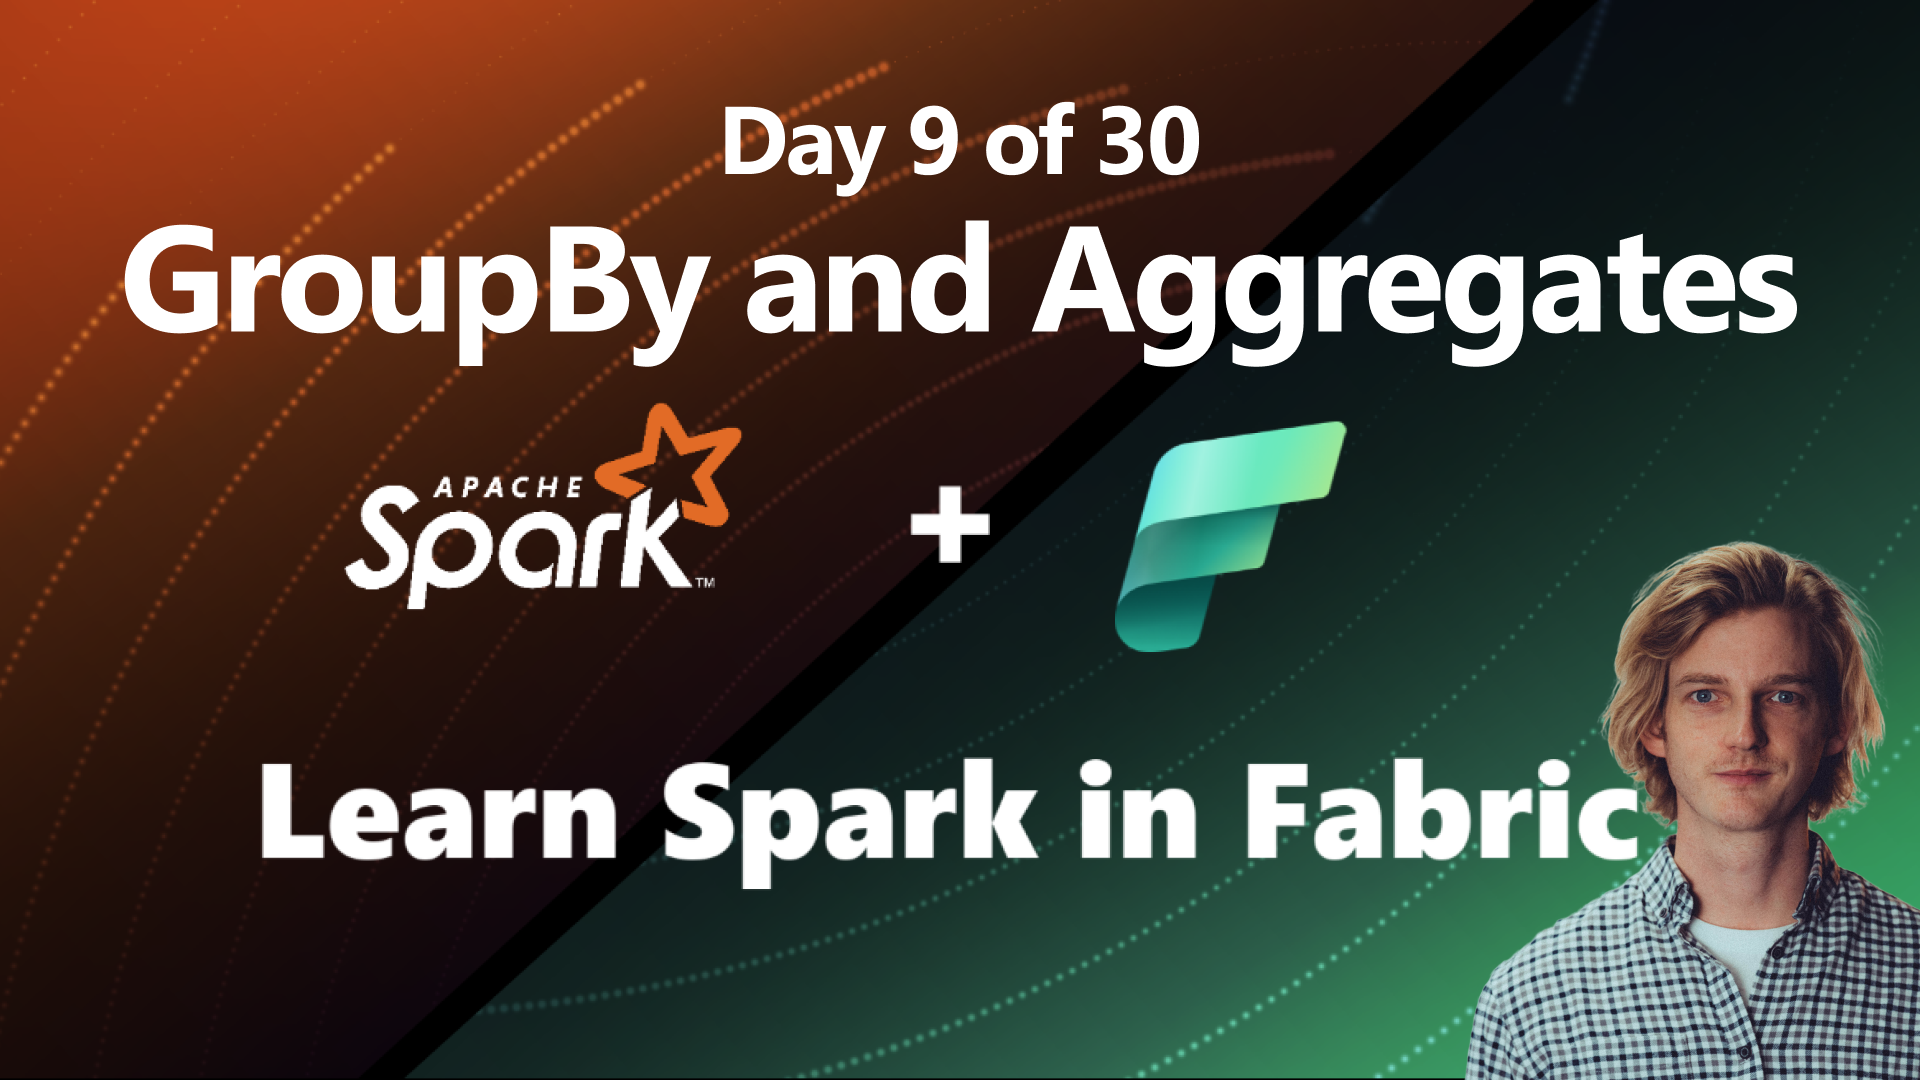

#### First, let's grab some (extended data)
Added a few more rows to the dataset so we can do some group-by calcs :)

In [ ]:
df = spark.read.csv('Files/property-sales-extended.csv', header=True, inferSchema=True)
df.show()

#### Simple aggregates

In [ ]:
#Counting rows in the group 
df.groupBy('City').count().show()


In [ ]:
# maximum sales price for each agent
df.groupBy('Agent')\
  .max('SalePrice_USD')\
  .show()


#### Renaming the aggregate column


In [ ]:
from pyspark.sql.functions import sum, max

# method 1: using withColumnRenamed() 
df.groupBy('Agent')\
  .max('SalePrice_USD')\
  .withColumnRenamed('max(SalePrice_USD)','max_sales_price')\
  .show()

# method 2: using agg() and then alias() 
df.groupBy("Agent") \
  .agg(max('SalePrice_USD').alias('max_sales_price'))\
  .show()


#### Returning multiple aggregates in same dataframe

In [ ]:
from pyspark.sql.functions import avg,max, round
df.groupBy("City").agg(
    round(max("SalePrice_USD"),0).alias("max_sale_price"), 
    round(avg("SalePrice_USD"),0).alias("avg_sale_price")
    ).show() 


#### Filtering on an aggregate (like SQL HAVING statement)

In [ ]:
from pyspark.sql.functions import avg,max, round, col

df.groupBy("City").agg(
    round(max("SalePrice_USD"),0).alias("max_sale_price"), 
    round(avg("SalePrice_USD"),0).alias("avg_sale_price")
).where(col("avg_sale_price") >= 500000)\
.show() 

#### Grouping by multiple columns

In [ ]:
df.groupBy(['City', 'Agent']).avg('SalePrice_USD').show()

---
#### Your final tasks: 

✅ View this notebook and all others in this series on GitHub. 

✅ Leave a comment below

✅ Subscribe 

✅ Like